# Redes Neuronales

## Representaciones de datos para redes neuronales

En el último ejemplo, comenzamos trabajando con datos almacenados en arrays multidimensionales de NumPy, también llamados *tensores*. En general, todos los sistemas de ML actuales utilizan tensores como su estructura de datos básica.

De forma básica, un tensor es un contenedor de datos, usualmente datos numéricos. Por lo que es un contenedor para números. Ya conocemos las matrices, que son tensores de rango 2: los tensores son generalizaciones de matrices a un número arbitrario de *dimensiones* (en este contexto, una dimensión a menudo se conoce como *eje* (*axis*).

### Escalares (Tensores de rango 0)

Un tensor que sólo contiene un número se llama *escalar* (*tensor escalar*, *tensor de rango 0*, etc). Usando NumPy, un número del tipo `float32`o `float64` es un tensor escalar. 

Podemos ver el número de *axis* de un tensor de NumPy usando el atributo `ndim`; un tensor escalar tiene 0 ejes. El número de ejes de un tensor también se conoce como su *rango*. Veamos:

In [1]:
import numpy as np

x = np.array(42)

x

array(42)

In [2]:
x.ndim

0

### Vectores (Tensores de rango 1)

Un array de números se conoce como un *vector* o *tensor de rango 1*.

In [3]:
y = np.array([42, 15, 6, 14, 7])

y

array([42, 15,  6, 14,  7])

In [4]:
y.ndim

1

Notemos que el vector tiene 5 entradas, por lo que es un *vector de 5 dimensiones*. Pero ¡no nos confundamos! No es un tensor de rango 5. Este vector sólo tiene un eje y tiene cinco dimensiones sobre ese único eje.

### Matrices (Tensores de rango 2)

Un array de vectores es una *matriz*, o *tensor de rango 2*. Una matriz tiene dos ejes (filas y columnas). Podemos interpretarlo gráficamente como un arreglo rectangular de números.

In [5]:
z = np.array([[1,2,3,4,5],
            [1, 4, 9, 16, 25],
            [1, 8, 27, 64, 125]])

z

array([[  1,   2,   3,   4,   5],
       [  1,   4,   9,  16,  25],
       [  1,   8,  27,  64, 125]])

In [6]:
z.ndim

2

### Tensores de rango 3 y superiores

Si juntamos matrices para formar un nuevo array, obtenemos un *tensor de rango 3*, que podemos interpretar visualmente como un cubo de números. 

In [7]:
w = np.array([[[5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]],
            [[5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]],
            [[5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]]])

w

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [8]:
w.ndim

3

Entonces, para resumir, decimos que un tensor se define por tres atributos principales:

- Número de ejes (rango)

- Forma (*shape*): Es una tupla de enteros que describe cuántas dimensiones tiene el tensor en cada eje. Por ejemplo, la matriz del ejemplo tiene forma `(3,5)`, y el tensor de rango 3 tiene forma `(3,3,5)`. El vector tiene un solo elemento, por lo que tiene forma `(5,)`, mientras que el escalar no tiene ejes, por lo que tiene forma `()`.

- Tipo de datos (llamados `dtype` en Python): Corresponde al tipo de dato contenido en el tensor. 

Para dejarlo más claro, volvamos a los datos del ejemplo del MNIST. Primero, cargamos el conjunto de datos del MNIST:

In [9]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Veamos el número de ejes del tensor `train_images`:

In [10]:
train_images.ndim

3

Su forma es:

In [11]:
train_images.shape

(60000, 28, 28)

Y el tipo de dato:

In [12]:
train_images.dtype

dtype('uint8')

Entonces, tenemos un tensor de rango 3 con enteros de 8 bits. Con mayor precisión, es un array de 60,000 matrices de 28 x 28 enteros. Cada una de las matrices es una imagen en escala de grises, con coeficientes entre 0 y 255.

Por mera curiosidad, veamos cómo se ve el cuarto dígito en este tensor de rango 3, usaremos la biblioteca Matplotlib.

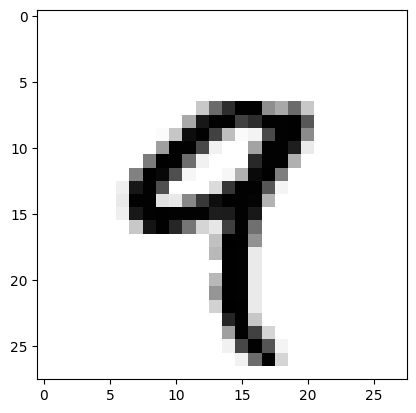

In [13]:
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap = plt.cm.binary)

plt.show()

Parece un 9, pero verifiquemos.

In [14]:
train_labels[4]

9

### Manipulando tensores en NumPy

En el ejemplo anterior, seleccionamos un dígito en específico a lo largo del primer ejer utilizando la sintaxis `train_images[i]`. El seleccionar elementos específicos de un tensor se conoce como *slicing* (rebanar). Veamos las operaciones de slicing que podemos hacer sobre arreglos de NumPy.

En el siguiente ejemplo, seleccionamos los dígitos del #10 al 100 (sin incluir al 100) y se genera un array de forma `(90, 28, 28)`:

In [15]:
my_slice = train_images[10:100]

In [17]:
my_slice.shape

(90, 28, 28)

De manera equivalente, utilizando una notación más detallada, donde específicamos el índice inicial y el final para la rebanada sobre cada eje del tensor, podemos escribir:

` my_slice = train_images[10:100, : , :] ` <----- Equivalente al ejemplo anterior

` my_slice = train_images[10:100, 0:28, 0:28]` <---- También equivalente al ejemplo anterior.

En general, podemos seleccionar rebanadas entre dos índices cualquiera a lo largo de cada eje del tensor. Por ejemplo, para seleccionar 14 x 14 pixeles en la esquina inferior derecha de todas las imágenes podemos hacer lo siguiente:

In [18]:
my_slice = train_images[:, 14:, 14:]

También es posible utilizar índices negativos. Similar a los índices negativos en las listas de Python, indican una posición respecto al último elemento del eje en cuestión. Para poder recortar las imágenes a parches de 14 x 14 pixeles centradas a la mitad, escribiríamos:

In [19]:
my_slice = train_images[:, 7:-7, 7:-7]

Veamos cómo se ve este rebanamiento de las imágenes:

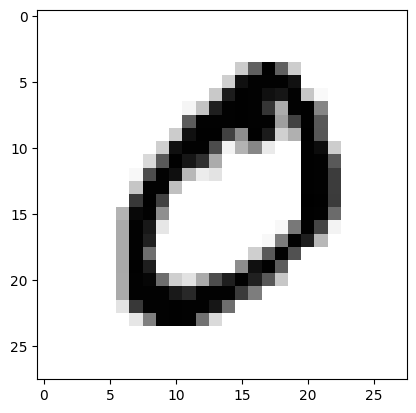

In [23]:
plt.imshow(train_images[1], cmap = plt.cm.binary)

plt.show()

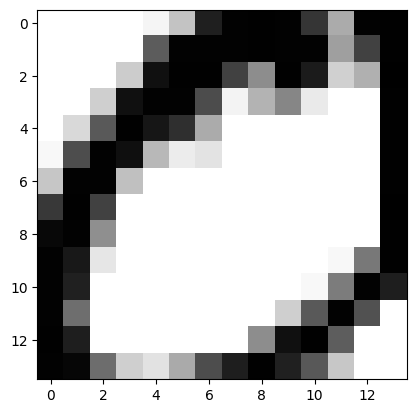

In [22]:
plt.imshow(my_slice[1], cmap = plt.cm.binary)

plt.show()

### Batches 

En general, el primer eje (eje 0) en todos los datos tensoriales que nos encontremos en deep learning serán los *ejes muestra* (*samples axis* o *samples dimension*). En el ejemplo del MNIST, las "muestras" son las imágenes de los dígitos.

Además, los modelos de DL no suelen procesar un conjunto de datos en su totalidad una sola vez; sino que se suelen partir en pequeños lotes de datos (*batches*).  Concretamente, aquí tenemos un batch de nuestro conjunto MNIST, con tamaño (*batch size*) de 128:

In [24]:
batch = train_images[:128]

El siguiente batch:

In [25]:
batch = train_images[128:256]

Y el $n$-ésimo batch:

In [26]:
n = 5

batch = train_images[128 * n:128 * (n + 1)]

### Ejemplos de datos tensoriales

Para encontrarle un poco más de sentido a los datos tensoriales, consideremos algunos ejemplos similares a los que podríamos encontrarnos al momento de realizar un proyecto de deep learning.

 - *Datos vectoriales* Suelen ser tensores de rango 2 de forma `(samples, features)`, donde cada muestra es un vector de atributos numéricos, o características.

 - *Series de tiempo* o *datos secuenciales* Son tensores de rango 3 de forma `(samples, timesteps, features)`, donde cada muestra es una secuencia, de longitud `timesteps` de vectores de atributos.

 - *Imágenes* Son tensores de rango 4 con forma `(samples, height, width, channels)`, donde cada muestra es una malla de pixeles en 2D, donde cada pixel es representado por un vector de valores (`channels`).

 - *Video* Son tensores de rango 5 de forma `(samples, frames, height, width, channels)`, donde cada muestra es una secuencia (de longitud `frames`) de imágenes.

 Ya que nuestro interés se centrará en datos tensoriales en forma de imágenes haremos un poco más de énfasis en este tipo de datos.

 #### Datos de imágenes

 Las imágenes típicamente tienen tres dimensiones: altura, ancho y profundidad de color. A pesar de que las imágenes en escala de gris (como los dígitos del MNIST) tienen sólo un canal de color y podrían entonces ser almacenadas en tensores de rango 2, por convención los tensores imagen siempre son de rango 3, con un canal de color unidimensional para las imágenes en escala de gris. Un batch de 128 imágenes en escala de gris de tamaño `256 x 256` puede entonces almacenarse en un tensor de forma  `(128, 256, 256, 1)` y un batch de 128 imágenes a color se puede almacenar en un tensor de forma  `(128, 256, 256, 3)`

<div style="text-align: center">
    <figure>
        <img src='https://i.postimg.cc/MH3gmdbg/image-data-tensor.png' width='500' height='400' /> <br>
        <figcaption> Representación de un tensor de datos de imagen de rango 4.</figcaption>
    </figure>
</div>


Existen dos convenciones para las formas de los tensores de imagen: la convención *channels-last* (que es la estándar en TensorFlow) y la convención *channels-first*. La primera convención coloca al eje del color al último: `(samples, height, width, color_depth)`. Mientras que la segunda coloca al eje de color después del eje del batch `(samples, color_depth, height, width)`.
Con la convención *channels-first*, los ejemplos anteriores pasarían a ser: `(128, 1, 256, 256)` y `(128, 3, 256, 256)`. La API de Keras soporta ambos formatos.

## Operaciones tensoriales

Básicamente cualquier programa de computadora puede ser reducido a un conjunto pequeño de operaciones binarias sobre entradas binarias (`AND`, `OR`, `NOR`, etc.), todas las transformaciones aprendidas por las redes neuronales pueden ser reducidas a un conjunto de *operaciones tensoriales* aplicadas a tensores de datos numéricos. Por ejemplo, es posible sumar tensores, multiplicar tensores, y así sucesivamente.

En nuestro ejemplo inicial, construimos nuestro modelo al apilar capas `Dense`una sobre otra. Una instancia de capa en Keras se ve así:

    keras.layers.Dense(512, activation = "relu")

Esta capa se puede interpretar como una función, la cual toma como entrada a una matriz y devuelve otra matriz, que en este contexto es una nueva representación para el tensor de entrada. Específicamente, la función se define como sigue:

$$ \text{output} = \text{relu}(\text{dot}(\text{input}, W) + b) $$

donde $W$ es una matriz y $b$ es un vector, y ambos son atributos de la capa. Veamos a detalle la definición anterior, tenemos tres operaciones tensoriales aquí:

 - Un producto punto (`dot`) entre el tensor de entrada y un tensor $W$.

 - Una suma (+) entre la matriz resultante y un vector $b$.

 - Una operación `relu`: $ \text{ReLU}(x) = \max{x,0}$


### Operaciones por elementos

La operación `relu` y la suma son elementos por elementos: operaciones que son aplicadas independientemente a cada entrada en los tensores considerados. Esto significa que estas operaciones se prestan a implementaciones masivas en paralelo. Si quisieramos implementar una operación elemento a elemento en Python, podemos utilizar un ciclo `for`, por ejemplo en esta implementación de la operación `relu`:

In [30]:
def relu(x):

    assert len(x.shape) == 2 # Verificamos que x sea un tensor de NumPy de rango 2

    x = x.copy() # Evitamos volver a escribir el tensor de entrada

    for i in range(x.shape[0]):

        for j in range(x.shape[1]):

            x[i,j] = max(0, x[i,j])

    return x

Lo mismo podemos hacer para la suma:

In [33]:
def suma(x, y):

    assert len(x.shape) == 2 
    assert x.shape == y.shape

    x = x.copy()

    for i in range(x.shape[0]):

        for j in range(y.shape[1]):

            x[i,j] += y[i,j] # += es un operador: x += 1 equivale a x = x + 1

    return x


Y siguiendo esta misma idea, podemos hacer las operaciones de multiplicación, substracción, etc. En la práctica, cuando tratammos con arrays de NumPy, estas operaciones están disponibles como funciones nativas bien optimizadas. En NumPy, podemos hacer las siguientes operaciones y son increíblemente rápidas:

In [35]:
 import numpy as np

 z = x + y

 print(z)

[84 57 48 56 49]


In [38]:
z = np.maximum(0, z)

print(z)

[84. 57. 48. 56. 49.]


Veamos la diferencia que existe entre implementar las funciones que definimos y las de NumPy.

In [39]:
import time

x = np.random.random((20, 1000))

y = np.random.random((20, 1000))

In [41]:
t_0 = time.time()

for _ in range(1000):

    z = x + y
    z = np.maximum(0., z)

print("Tardó: {0:.2f} s".format(time.time() - t_0))

Tardó: 0.03 s


In [43]:
t0 = time.time()

for _ in range(1000):

    z = suma(x, y)
    z = relu(z)

print("Tardó: {0:.2f} s".format(time.time() - t0))

Tardó: 13.47 s


### Broadcasting